In [1]:
import numpy as np
import pandas as pd
from scipy.stats import laplace
import scipy.stats
import psycopg2
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import timedelta  
import threading

In [2]:
param_dic = {
    "host"      : "localhost",
    "database"  : "bachelorBesoeg2014",
    "user"      : "postgres",
    "password"  : "password",
    "port"      : "5432"
}

def execRangeQuery(params_dic,dates):
    query = """
    SELECT
    sum(count_)
    FROM _775147
    WHERE
    time_ >= '{date0}'
    AND time_ <=  '{date1}'
    ;
    """.format(date0 = dates[0], date1 = dates[1])
    try:
        connection = psycopg2.connect(**params_dic)
        cursor = connection.cursor()
        cursor.execute(query)
        record = cursor.fetchall()
        return record
    except (Exception, psycopg2.Error) as error :
        connection = False
        print ("Error while connecting to PostgreSQL", error)
    finally:
        if(connection):
            cursor.close()
            connection.close()
            print("Executed query and closed connection.")

def execQuery(params_dic,query):
    try:
        connection = psycopg2.connect(**params_dic)
        cursor = connection.cursor()
        cursor.execute(query)
        record = cursor.fetchall()
        return record
    except (Exception, psycopg2.Error) as error :
        connection = False
        print ("Error while connecting to PostgreSQL", error)
    finally:
        if(connection):
            cursor.close()
            connection.close()
            print("Executed query and closed connection.")
#"""select count(*) as number_of_dates, count(DISTINCT  count_) as distinct_count from _775147;"""
query = """select time_ from _775147;"""
result = execQuery(param_dic, query)
dates = [(date[0]) for date in result]

query = """select count_ from _775147;"""
result = execQuery(param_dic, query)
"""
print(result)
print(type(result))
print(type(result[0]))
print((str(result[0][0])))
"""
counts = [(count[0]) for count in result]

Executed query and closed connection.
Executed query and closed connection.


In [3]:
def add_missing_dates(old_dates):
    start_date = dates[0]
    end_date = dates[-1]
    all_dates = pd.date_range(start = start_date, end = end_date).to_pydatetime().tolist()
    return [(date.date()) for date in all_dates]
    
def add_missing_counts(old_counts, old_dates, new_dates):
        """Adds 0 to the list of counts where there was missing dates
        Parameters:
        old_counts (list of int): List counts for each day with 
        old_dates (list of datetime.date): List of dates that is not countious
        Returns:
        List of countious starting with the first value of 
        """
        zip_iterator = zip(old_dates, old_counts)
        missing_dict =  dict(zip_iterator)
        all_counts = np.zeros(len(new_dates))
        for i, date in enumerate(new_dates):
            val = missing_dict.get(date, 0)
            all_counts[i] = val
            
        return all_counts

In [4]:
all_dates = add_missing_dates(dates)
all_counts =  add_missing_counts(counts, dates, all_dates)

In [5]:
np.random.uniform(-1,0,1000)
def randomized_response(x, p=0.1):
    if np.random.uniform(0,1) < p:
        return x
    else:
        return np.random.randint(2)

In [6]:
randomized_response(1)

0

In [7]:
a = np.array([[0,1,2,3,4],[5,6,7,8,9],[0,1,2,3,4],[5,6,7,8,9],[0,1,2,3,4],[5,6,7,8,9]])

In [8]:
a[:,0]

array([0, 5, 0, 5, 0, 5])

In [9]:
epsilon = 0.6
print(1/(1+np.exp(epsilon)))

0.35434369377420455


In [10]:
class OUE:
    def __init__(self, epsilon):
        # We need the stream to be a power of 2
        self.epsilon = epsilon
        
    
    def process(self, e_i):
        o_i = e_i.copy()
        for idx, j in enumerate(e_i):
            if i == 1:
                o_i[idx] = np.random.randint(2)
            else:
                if np.random.uniform(0,1) < 1/(1+np.exp(epsilon)):
                    o_i[idx] = 1
                else:
                    o_i[idx] = 0
                    
    def aggreation(self, day, lst):
        return ( ( lst[:,day] +len(lst)/(1+np.exp(epsilon))) * (1/2 -1/(1+np.exp(epsilon))))
        
                

In [11]:
len(all_dates)
print(all_dates[0]-all_dates[-1])

-2005 days, 0:00:00


In [12]:
oue_count_lock = threading.Lock()
oue_count_lock.acquire()
oue_count_lock.release()

In [13]:
#len(oue_count)

In [14]:
def OUE_func_2(e_i, epsilon):
    #print('Call')
    #print(e_i)
    if e_i == 1:
        #print('if')
        return np.random.randint(2)
    else:
        #print('else')
        if np.random.uniform(0,1) < 1/(1+np.exp(epsilon)):
            return 1
        else:
            return 0

In [15]:
def OUE_answear(data, i, epsilon):
    return (data[i]/len(data) + len(data)/(1+np.exp(epsilon))) / (1/2 -1/(1+np.exp(epsilon)))

In [16]:
D = len(all_dates) 
oue_count = np.zeros(D)

In [17]:

vfunc = np.vectorize(OUE_func_2, otypes = [int])
epsilon = 1
vfunc([0,1,1,1,1], epsilon)
for idx, count in enumerate(all_counts):
    #print(idx)
    #print(count)
    for i in range(0,int(count)):
        sparse = np.zeros(D)
        sparse[idx] = 1
        dense = vfunc(sparse,epsilon)
        oue_count = oue_count + dense

KeyboardInterrupt: 

In [ ]:
print(idx)
print(count)
print(i)

In [ ]:
print(oue_count)

In [ ]:
#np.savetxt('oue_count.csv', oue_count, delimiter=',')

In [ ]:
print(( oue_count[0] +len(oue_count)/(1+np.exp(epsilon))) * (1/2 -1/(1+np.exp(epsilon))))

In [ ]:
vfunc = np.vectorize(OUE_func_2, otypes = [int])
vfunc([0,1,1,1,1], 0.2)

In [18]:
epsilon = 1
np.exp(epsilon)+1

3.718281828459045

In [19]:
def OUE_func(e_i, epsilon):
    o_i = e_i.copy()
    for idx, j in enumerate(e_i):
        if j == 1:
            o_i[idx] = np.random.randint(2)
        else:
            if np.random.uniform(0,1) < 1/(1+np.exp(epsilon)):
                o_i[idx] = 1
            else:
                o_i[idx] = 0
    return o_i

In [20]:
class flat_OUE:
    def __init__(self, epsilon, dates, counts):
        
        self.dates = dates
        self.real_counts = counts
        self.epsilon = epsilon
        self.counts = self.process(dates, counts)
        self.D = len(dates)
        
        values = np.arange(0,len(self.dates))
        zip_iterator = zip(self.dates, values)
        self.idx_dict =  dict(zip_iterator)
    
    def process(self, dates, counts):        
        vfunc = np.vectorize(OUE_func_2, otypes = [int])
        for idx, count in enumerate(all_counts):
            for i in range(0,int(count)):
                sparse = np.zeros(D)
                sparse[idx] = 1
                dense = vfunc(sparse,self.epsilon)
                oue_count = oue_count + dense
        return oue_count
    
    def answer(self, dates):
        
        if (len(dates) < 2):
                date_obj_0 = datetime.strptime(dates[0],'%Y-%m-%d').date()
                #print(date_obj_0)
                #print(type(date_obj_0))
                idx = self.idx_dict[date_obj_0]
                return self.noise_counts[idx]
            
        else:
            date_obj_0 = datetime.strptime(dates[0],'%Y-%m-%d').date()
            date_obj_1 = datetime.strptime(dates[1],'%Y-%m-%d').date()
            idx_0 = self.idx_dict[date_obj_0]
            idx_1 = self.idx_dict[date_obj_1]

                #idx_0 is not 0
            if idx_0:
                return self.noise_counts[idx_1] - self.noise_counts[idx_0-1]            
            else:
                return self.noise_counts[idx_1]

In [21]:
def OLH_func(x, epsilon, g):
    if np.random.uniform(0,1) < np.exp(epsilon)/(np.exp(epsilon)+g-1):
        #print('if')
        return x
    else:
        return np.random.randint(low = 0, high = g)
    
def OLH_answer(data, j, epsilon, N, g):
    p = np.exp(epsilon)/(np.exp(epsilon)+g-1)
    #print(p - 1/g)
    return (data[j]- N/g) / (p)

In [22]:
epsilon = 0.7
g = 2005
print(np.exp(epsilon)/(np.exp(epsilon)+g+1))

0.0010028580256262031


In [23]:
D = len(all_dates) 
OLH_count = np.zeros(D)

In [24]:
epsilon = 1
for idx, count in enumerate(all_counts):
    for i in range(0,int(count)):
        response = OLH_func(idx, epsilon, D)
        OLH_count[response] = OLH_count[response] + 1

In [25]:
#print(OLH_count)
#print(np.sum(OLH_count))
print(all_counts[1174])
print(OLH_answer(OLH_count, 1174, epsilon, np.sum(OLH_count), D))
#N = np.sum(all_counts)
N = len(all_counts)
print(f'var should be {4*np.exp(epsilon) / (N*np.exp(epsilon) - N)**2}')

29277.0
37617.333213687096
var should be 9.151743117683762e-07


In [27]:
#np.sum(all_counts)

In [28]:
#all_dates[0:100]

In [29]:
#print(all_counts[0:100])

In [30]:
def get_index(date_idx, n_layers):
    """Calculates the path of index in full binary string

    Parameters:
    date_idx (int): The node in the bouttom layer we want to calculate a path to. 
    The bottom layer has index from 0 to 2**h-1
    n_layers (int): The height of the full binary tree. starts from 0 

    Returns:
    list: of index in the path from the starting from the bottom and going up

    """
    idx = []
    for i in np.arange(0,n_layers):
        if i == 0:
            idx.append(int(date_idx))
        else:
            idx.append(int(idx[i-1]//2))
    idx.append(0)
    return idx

def left_or_right(current, nxt):
    #0 is left 1 is right
    #print(f'current = {current}, nxt = {nxt}')
    if nxt == 0:
        #print('nxt == 0')
        return 0
    if current == 0 and current < nxt:
        #print('current == 0 and current < nxt')
        return 1
    elif 2* current < nxt:
        #print('2* current < nxt')
        return 1
    else:
        #print('else')
        return 0

In [31]:
my_data = np.genfromtxt('oue_count.csv', delimiter=',')

In [32]:
my_data

array([112676., 113258., 113340., ..., 112793., 113254., 112382.])

In [33]:
epsilon = 1
print( (my_data[0]/len(my_data) + len(my_data)/(1+np.exp(epsilon))) / (1/2 -1/(1+np.exp(epsilon))) )
print(OUE_answear(my_data, 0, epsilon))

2577.9868738285472
2577.9868738285472


In [35]:
print(len(my_data))
print(len(all_dates))

2006
2006


In [36]:
T = len(dates)
T = 2**np.ceil(np.log2(T))
n_layers = int(np.log2(T))
print(n_layers)
print()

11



In [37]:
np.full(n_layers+1,1/(n_layers+1))

array([0.08333333, 0.08333333, 0.08333333, 0.08333333, 0.08333333,
       0.08333333, 0.08333333, 0.08333333, 0.08333333, 0.08333333,
       0.08333333, 0.08333333])

In [38]:
#np.random.choice(np.arange(1, 7), p=[0.1, 0.05, 0.05, 0.2, 0.4, 0.2])
prob = np.full(n_layers+1,1/(n_layers+1))
level = np.random.choice(np.arange(0, n_layers+1), p = prob ) 
print(level)

1


In [39]:
levels = np.arange(0, n_layers+1)

In [40]:
"""
for level in levels:
    print(level)
    print(2**level)
    print(np.zeros(2**level))
"""

'\nfor level in levels:\n    print(level)\n    print(2**level)\n    print(np.zeros(2**level))\n'

In [41]:
tree_levels = []
h = int(np.ceil(np.log2(len(dates))))
for i in np.arange(0,h+1):
    level = np.zeros(int(2**np.ceil(i)))
    tree_levels.append(level) 

In [42]:
print(tree_levels)

[array([0.]), array([0., 0.]), array([0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [43]:
def HH_OUE(dates, counts, OUE, epsilon):
    h = int(np.ceil(np.log2(len(dates))))
    prob = np.full(h+1,1/(h+1))
    print(f'h = {h}')
    
    tree_levels = []
    for i in np.arange(0,h+1):
        level = np.zeros(int(2**np.ceil(i)))
        tree_levels.append(level) 
    
    #OUE response
    vfunc = np.vectorize(OUE, otypes = [int])
    
    
    for index, (date, day_count) in enumerate(zip(dates, counts)):
        #print(f'index = {index}, date = {date}, count = {day_count}')
        idxs = get_index(index,h)
        idxs.reverse()
        
        for person in range(int(day_count)):
            #print(person)
            level = np.random.choice(np.arange(0, h+1), p = prob ) 
            #print(f'we got level = {level}')
            tree_level = np.zeros(2**level,dtype=int)
            #print(idxs[level])
            #tree_level[index] = 1
            #get_index
            tree_level[idxs[level]] = 1
            perb_tree_level = vfunc(tree_level,epsilon)
            tree_levels[level] = tree_levels[level] + perb_tree_level
        #print(f'index = {index}, date = {type(date)}, count = {count}')
        #print(index, value1 + value2)  # for Python 2 use: `print index, value1 + value2` (no braces)
    return tree_levels

In [44]:
epsilon = 1.
hhs = HH_OUE(all_dates[:256],all_counts[:256],OUE_func_2,epsilon)

h = 8


In [66]:
def HH_OLH(dates, counts, OLH, epsilon):
    h = int(np.ceil(np.log2(len(dates))))
    prob = np.full(h+1,1/(h+1))
    #print(f'h = {h}')
    
    tree_levels = []
    for i in np.arange(0,h+1):
        level = np.zeros(int(2**np.ceil(i)))
        tree_levels.append(level) 
    
    for index, (date, day_count) in enumerate(zip(dates, counts)):
        #print(f'index = {index}, date = {date}, count = {count}')
        idxs = get_index(index,h)
        idxs.reverse()
        
        for person in range(int(day_count)):
            #print(person)
            level = np.random.choice(np.arange(0, h+1), p = prob ) 
            #print(f'we got level = {level}')
            tree_level = np.zeros(2**level,dtype=int)
            #print(tree_level)
            #print(idxs[level])
            #tree_level[index] = 1
            #get_index
            #print(tree_level)
            #print(2**level)
            if level != 0:
                response = OLH_func(idxs[level], epsilon, (2**level))
            else:
                response = 0
            #print(response)
            tree_level[response] = 1
            tree_levels[level] = tree_levels[level] + tree_level
            #print(f'index = {index}, date = {type(date)}, count = {count}')
            #print(index, value1 + value2)  # for Python 2 use: `print index, value1 + value2` (no braces)
            
    return tree_levels

In [46]:
epsilon = 1.
hhs = HH_OLH(all_dates[:32],all_counts[:32],OLH_func,epsilon)

h = 5


In [47]:
print(hhs)

[array([1059.]), array([501., 468.]), array([241., 235., 255., 267.]), array([117., 159., 110., 130., 124., 116., 159., 112.]), array([75., 61., 76., 77., 57., 68., 61., 61., 46., 66., 48., 49., 65.,
       66., 64., 61.]), array([37., 34., 32., 31., 31., 32., 38., 41., 24., 39., 26., 24., 37.,
       37., 25., 37., 29., 24., 29., 30., 29., 34., 38., 32., 32., 28.,
       39., 37., 35., 28., 34., 24.])]


In [48]:
def HH_OLH_answer(count, epsilon, N, g):
    p = np.exp(epsilon)/(np.exp(epsilon)+g-1)
    #print(p - 1/g)
    return (count- N/g) / (p)

In [63]:
def hh_olh_answer(tree, dates, olh_aggr, all_dates, all_counts, epsilon):
    #Only asking for one date.
    #print(all_dates)
    values = np.arange(0,len(all_dates))
    zip_iterator = zip(all_dates, values)
    idx_dict =  dict(zip_iterator)
    h = int(np.ceil(np.log2(len(all_dates))))
    #h = 5 
    date_obj_0 = datetime.strptime(dates[0],'%Y-%m-%d').date()
    date_obj_1 = datetime.strptime(dates[1],'%Y-%m-%d').date()
    
    
    idx_0 = idx_dict[date_obj_0]
    idx_1 = idx_dict[date_obj_1]
    
    #print(idx_0)
    #print(idx_1)
    #print(np.log2(idx_1+1).is_integer())
    
    path0 = get_index(idx_0,h)
    #print(path0)
    path0.reverse()
    #print(path0)
    path1 = get_index(idx_1,h)
    #print(path1)
    path1.reverse()
    #print(path1)
    if idx_0 == 0 and np.log2(idx_1+1).is_integer():
        sum_level = list(map(lambda i: i> 0, path1)).index(True)-1
        #print(list(map(lambda i: i> 0, path1)).index(True))
        #print(list(map(lambda i: i> 0, path1)).index(True)-1)
        #print(f'Node count {tree[sum_level][0]}')
        #print(np.sum(all_counts))
        #print(len(all_dates))
        #print(f'Aggre Node count {olh_aggr(tree[sum_level][0], epsilon, np.sum(all_counts),len(all_dates))}')
        return olh_aggr(tree[sum_level][0], epsilon, np.sum(all_counts),len(all_dates))
    else:
        print(f'left is 0, 1 is right')
        sum = 0.0
        for i in range(len(path1)-1):
            #print(f'path1[i] = {path1[i]}')
            #print(f'path1[i+1] = {path[i+1]}')
            print(f'i = {i}')
            print(left_or_right(path1[i],path1[i+1]))
            if left_or_right(path1[i],path1[i+1]) == 1:
                #We went right
                print(f'path1[i+1] = {path1[i+1]}')
                print(tree[i+1])
                print(tree[i+1][path1[i+1]-1])
                #sum = sum + olh_aggr(tree[sum_level][0], epsilon, np.sum(all_counts),len(all_dates))
            #print(tree[i])
            #print('')
    print(all_counts[idx_0:idx_1])
    print(f'Real answer is {np.sum(all_counts[idx_0:idx_1+1])}')
    #print(OLH_answer(count, epsilon, np.sum(OLH_count), D))
    #D = len(all_dates) 

In [57]:
query_dates = ('2014-01-02','2014-01-9')
for level in hhs:
    print(level)
#print(all_dates[:10])
hh_olh_answer(hhs, query_dates, HH_OLH_answer, all_dates[:32], all_counts[:32], epsilon)


[1059.]
[501. 468.]
[241. 235. 255. 267.]
[117. 159. 110. 130. 124. 116. 159. 112.]
[75. 61. 76. 77. 57. 68. 61. 61. 46. 66. 48. 49. 65. 66. 64. 61.]
[37. 34. 32. 31. 31. 32. 38. 41. 24. 39. 26. 24. 37. 37. 25. 37. 29. 24.
 29. 30. 29. 34. 38. 32. 32. 28. 39. 37. 35. 28. 34. 24.]
0
7
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 1, 3, 7]
Node count 241.0
Aggre Node count 632.2297632834155


632.2297632834155

In [67]:
epsilons = np.array([2,1.4,1.2,1,0.8,0.7,0.5,0.4,0.3])
error_dicts = {}
test_dates = all_dates[:32].copy()
test_counts = all_counts[:32].copy()
for e in epsilons:
    print(e)
    number_of_queries = 100
    range_dates = ('2014-01-02','2014-01-9')
    answears = np.zeros(number_of_queries)
    corret_answear = np.sum(all_counts[0:8])
    for i in range(0,number_of_queries):
        hhs = hhs = HH_OLH(test_dates, test_counts,OLH_func,e)
        a = hh_olh_answer(hhs, range_dates, HH_OLH_answer, test_dates, test_counts, e)
        answears[i] = a
    error = np.abs(corret_answear-answears)
    max_error = np.amax(error)
    min_error = np.amin(error)
    true_values = np.full(number_of_queries, corret_answear)
    #vfunc = np.vectorize(relative_error)
    #rel_erorrs = vfunc(answears, corret_answear)
    mse = mean_squared_error(true_values, answears)
    error_dicts[e] = {'mse': mse, 'max': max_error, 'min': min_error, 'abs': np.mean(error)}



2.0
1.4
1.2
1.0
0.8
0.7
0.5
0.4
0.3


In [69]:
#Getting all error values from dict
n = len(error_dicts)
mse_errors = np.zeros(n)
min_errors = np.zeros(n)
max_errors = np.zeros(n)
abs_errors = np.zeros(n)

for num, item in enumerate(error_dicts.items()):
    mse_errors[num] = item[1]['mse']
    min_errors[num] = item[1]['min']
    max_errors[num] = item[1]['max']
    abs_errors[num] = item[1]['abs']

In [72]:
error_stack = np.vstack((min_errors,mse_errors,max_errors,abs_errors)).flatten()
min_labels = np.full(min_errors.size, 'min errors')
mse_labels = np.full(mse_errors.size, 'mse errors')
max_labels = np.full(max_errors.size, 'max errors')
abs_labels = np.full(abs_errors.size, 'abs errors')


labels_stack = np.vstack((min_labels,mse_labels,max_labels,abs_labels)).flatten()
epsilons_stack = np.vstack((epsilons,epsilons,epsilons,epsilons)).flatten()


In [73]:
seaborn_df = pd.DataFrame({'epsilons':epsilons_stack, 'errors':error_stack,'labels':labels_stack})
seaborn_df.to_csv('local_hh_seaborn_plotting_data.csv',index=False)

In [77]:
all_data = pd.DataFrame({'epsilons':epsilons, 'min_errors':min_errors,'max_errors':min_errors,'mse_errors':mse_errors,'abs_errors':abs_errors})
all_data.to_csv('local_hh_plotting_data.csv',index=False)

In [78]:
sns.set()

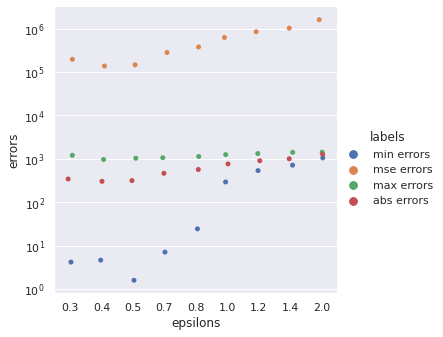

In [79]:
sns_plot = sns.catplot(x="epsilons", y="errors", hue="labels", data=seaborn_df)
sns_plot.set(yscale="log")
sns_plot.savefig("local_hh_AllErrors.png")


In [ ]:
sns_plot = sns.scatterplot(data=seaborn_df.loc[seaborn_df['labels'] == 'min errors'], x ='epsilons', y ='errors')
plt.legend(labels=['min errors'])
sns_plot.get_figure().savefig('con_min_error.png') 

In [52]:
print(get_index(0,1))
print(get_index(0,2))
print(get_index(0,3))
print(get_index(10,4))
print(get_index(10,5))

[0, 0]
[0, 0, 0]
[0, 0, 0, 0]
[10, 5, 2, 1, 0]
[10, 5, 2, 1, 0, 0]


In [80]:
print(np.argmax(all_counts))

1174


In [ ]:
path = get_index(8,5)
path.reverse()
print(path)
for i in range(len(path)-1):
    #print(f'path[i] = {path[i]}')
    #print(f'path[i+1] = {path[i+1]}')
    print(f'left is 0, 1 is right')
    print(left_or_right(path[i],path[i+1]))

In [ ]:
def max_disjoint_B_adic_ranges(r, B):
    # r = length, B = log base
    #Fact 3
    #Any sub-range of length[a,b]of length r from [D] can be decomposed into ≤ (B−1)(2 logBr+1)disjoint B-adic ranges.
    #(B−1)(2 logBr+1)
    return (B-1)*(2* np.log(r+1) / np.log(B))

In [ ]:
B = 2
r = 20
print(max_disjoint_B_adic_ranges(r,B))
n = 74088
exp = 42
np.log(n) / np.log(exp)

In [ ]:
"""
[0110000,1101011]=
[0110000,0110000]∪
[0110001,1000000]∪
[1000001,1100000]∪
[1100001,1101000]∪
[1101001,1101010]∪
[1101011,1101011]
"""
print(f"[{int('0110000',2)},{int('1101011',2)}]")
print(f"[{int('0110000',2)},{int('0110000',2)}]")
print(f"[{int('0110001',2)},{int('1000000',2)}]")
print(f"[{int('1000001',2)},{int('1100000',2)}]")
print(f"[{int('1100001',2)},{int('1101000',2)}]")
print(f"[{int('1101001',2)},{int('1101010',2)}]")
print(f"[{int('1101011',2)},{int('1101011',2)}]")


In [ ]:
print(get_index(48,7))
print(get_index(107,7))
print(get_index(127,7))

In [ ]:
"""
D=32,B=2, the interval[2,22]
can be decomposed into sub-intervals
[2,3]∪[4,7]∪[8,15]∪[16,19]∪[20,21]∪[22,22].
"""
print('[2,3]')
print(get_index(2,5))
print(get_index(3,5))
print('[4,7]')
print(get_index(4,5))
print(get_index(7,5))
print('whole [4,7]')
print(get_index(4,5))
print(get_index(5,5))
print(get_index(6,5))
print(get_index(7,5))
print('[8,15]')
print(get_index(8,5))
print(get_index(15,5))
print('whole [8,15]')
print(get_index(8,5))
print(get_index(9,5))
print(get_index(10,5))
print(get_index(11,5))
print(get_index(12,5))
print(get_index(13,5))
print(get_index(14,5))
print(get_index(15,5))
